In [3]:
import pandas as pd



In [5]:
# Loading the dataset
data = pd.read_csv("healthcare-dataset-stroke-data.csv")  
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


Data cleaning & Transformation

In [8]:
# Checking missing values in bmi
print("Missing BMI values:", data['bmi'].isnull().sum())

# Filling missing BMI with median
data['bmi'].fillna(data['bmi'].median(), inplace=True)

# Verifying  no more missing values
print("Missing BMI values after imputation:", data['bmi'].isnull().sum())


Missing BMI values: 201
Missing BMI values after imputation: 0


C:\Users\rocki\AppData\Local\Temp\ipykernel_22256\807198456.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['bmi'].fillna(data['bmi'].median(), inplace=True)


In [10]:
# Checking the unique smoking status values
print("Smoking status values:", data['smoking_status'].unique())

# Filling missing values (if any) with 'Unknown'
data['smoking_status'].fillna('Unknown', inplace=True)

# Verifying  cleanup
print("Missing smoking status values after imputation:", data['smoking_status'].isnull().sum())


Smoking status values: ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Missing smoking status values after imputation: 0


C:\Users\rocki\AppData\Local\Temp\ipykernel_22256\620717325.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['smoking_status'].fillna('Unknown', inplace=True)


In [12]:
# List of categorical columns
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

# Apply one-hot encoding
data = pd.get_dummies(data, columns=categorical_cols, drop_first=True)

# Preview the updated dataset
data.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,61.0,0,0,202.21,28.1,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,80.0,0,1,105.92,32.5,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,49.0,0,0,171.23,34.4,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,79.0,1,0,174.12,24.0,1,False,False,True,False,False,True,False,False,False,True,False


In [14]:
from sklearn.preprocessing import StandardScaler

# Initialize scaler
scaler = StandardScaler()

# Columns to scale
num_cols = ['age', 'avg_glucose_level', 'bmi']

# Apply scaling
data[num_cols] = scaler.fit_transform(data[num_cols])

# Preview
data.head()


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,1.051434,0,1,2.706375,1.005086,1,True,False,True,False,True,False,False,True,True,False,False
1,51676,0.786070,0,0,2.121559,-0.098981,1,False,False,True,False,False,True,False,False,False,True,False
2,31112,1.626390,0,1,-0.005028,0.472536,1,True,False,True,False,True,False,False,False,False,True,False
3,60182,0.255342,0,0,1.437358,0.719327,1,False,False,True,False,True,False,False,True,False,False,True
4,1665,1.582163,1,0,1.501184,-0.631531,1,False,False,True,False,False,True,False,False,False,True,False


In the data cleaning phase, we began by removing the id column since it holds no predictive value. We then handled missing values in the bmi column by imputing them with the median value to preserve data consistency. For the smoking_status column, any missing or unknown entries were replaced with the category "Unknown" to ensure uniformity across the dataset.

Next, we addressed categorical variables — such as gender, ever_married, work_type, Residence_type, and smoking_status — using one-hot encoding to convert them into a format suitable for machine learning models. To prepare the data for model training, we also applied feature scaling using StandardScaler to normalize continuous variables (age, avg_glucose_level, and bmi), ensuring that all features contributed proportionally to the model.

Exploratory Data Analysis (EDA)

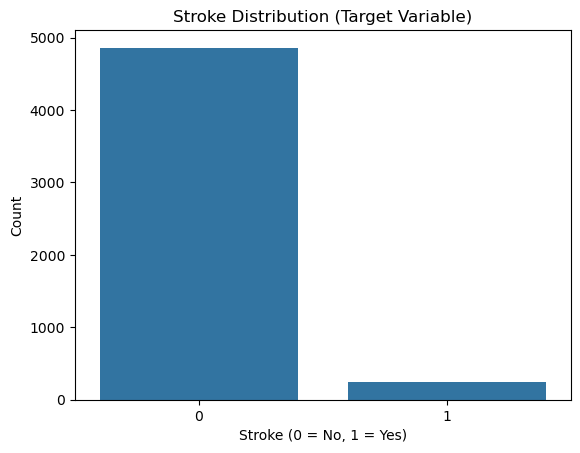

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot class distribution
sns.countplot(x='stroke', data=data)
plt.title("Stroke Distribution (Target Variable)")
plt.xlabel("Stroke (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

The dataset is highly imbalanced, with the majority of patients labeled as not having had a stroke (stroke = 0). Only a small fraction of records indicate stroke events (stroke = 1). This imbalance may affect model performance, especially in predicting stroke cases. Techniques like resampling, class weighting, or SMOTE may be needed to handle this imbalance effectively during model training.

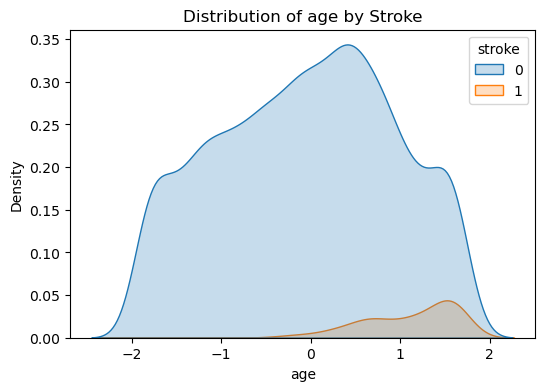

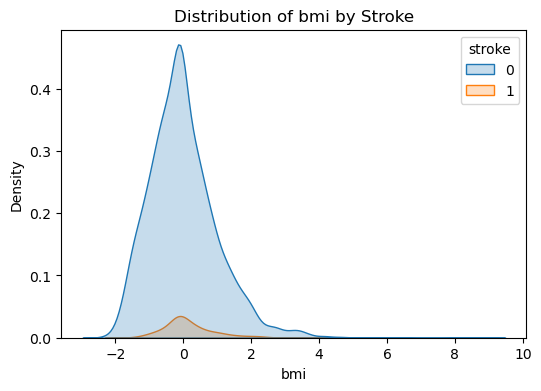

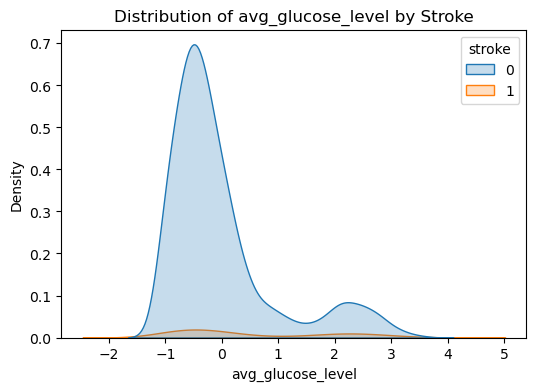

In [22]:
# Plotting numeric distributions by stroke outcome
features = ['age', 'bmi', 'avg_glucose_level']
for col in features:
    plt.figure(figsize=(6,4))
    sns.kdeplot(data=data, x=col, hue='stroke', fill=True)
    plt.title(f'Distribution of {col} by Stroke')
    plt.show()


 Age vs Stroke
Older individuals (right side of the plot) show a higher density for stroke cases. This indicates that age is positively correlated with stroke risk — older patients are more likely to have had a stroke.

 BMI vs Stroke
While the BMI distribution is similar across stroke and non-stroke groups, there is a slight upward shift in stroke cases, suggesting that higher BMI might slightly increase stroke risk, but it's less distinct than age.

 Average Glucose Level vs Stroke
Stroke patients tend to have higher average glucose levels, as seen from the heavier tail in the stroke group. This suggests that high glucose levels could be a significant predictor for stroke.

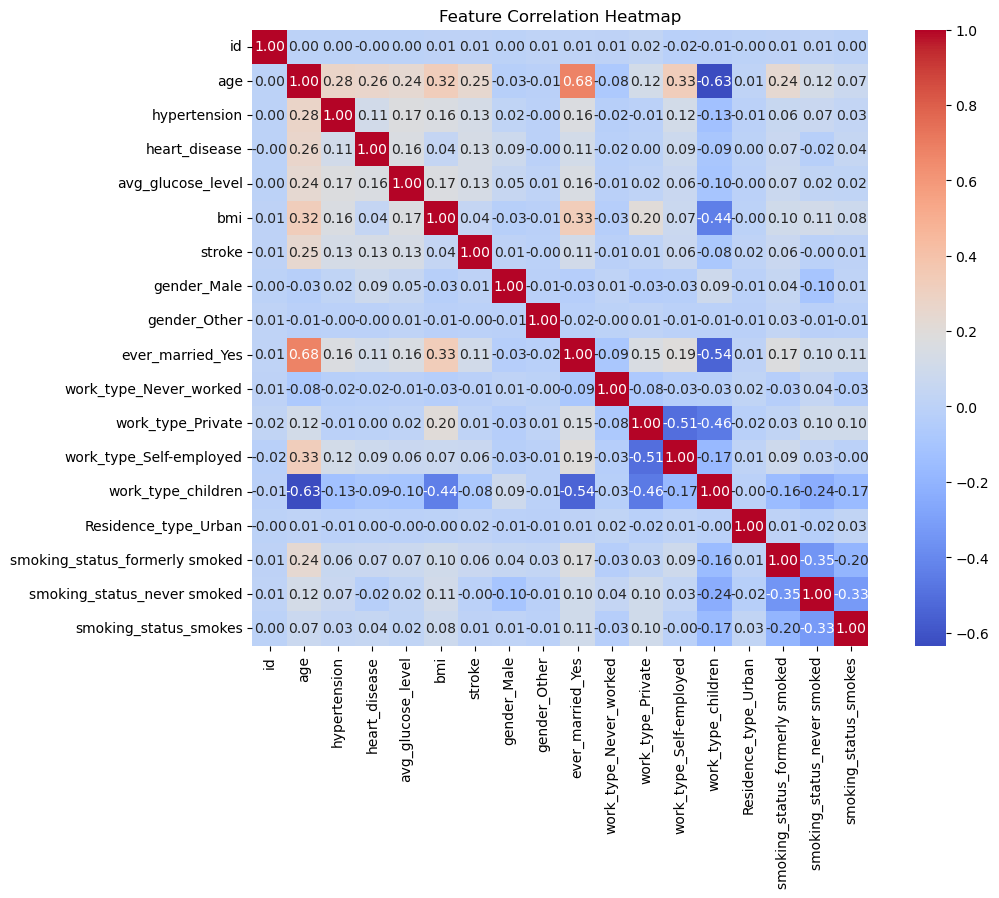

In [25]:
import numpy as np

# Compute correlation matrix
correlation = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Feature Correlation Heatmap")
plt.show()


age shows the strongest positive correlation with stroke (0.25), reinforcing that older age is a significant risk factor.

hypertension and heart_disease also have weak positive correlations (~0.13), suggesting they contribute modestly to stroke risk.

avg_glucose_level and bmi have weaker correlations (~0.13 and ~0.04 respectively), but still hold predictive value when combined with other features.

Most other features (like gender and work type categories) show very low or near-zero correlation, indicating minimal linear influence individually.

No feature is highly collinear with another — which is good for avoiding multicollinearity in our models.



EDA Summary:
Class Distribution: The dataset is highly imbalanced — most patients did not have a stroke.

Feature Distributions:

Stroke cases are more common among older individuals and those with higher glucose levels.

BMI has a slight right shift in stroke cases but is less distinct.

Correlation Analysis:

Age is the most strongly correlated feature with stroke risk.

Hypertension, heart disease, and glucose levels show weak but notable correlations.

No high multicollinearity observed, so all features are usable.

Model BUilding and Evaluation

🔎 Classification Report:

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.50      0.02      0.04        50

    accuracy                           0.95      1022
   macro avg       0.73      0.51      0.51      1022
weighted avg       0.93      0.95      0.93      1022

🔎 ROC-AUC Score: 0.84


C:\Users\rocki\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


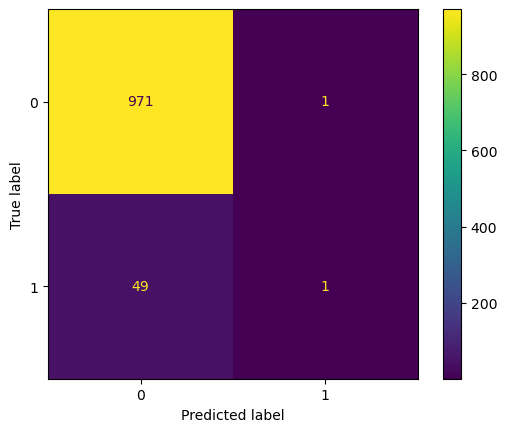

In [32]:
#Logistic regresiion classifier
# Step 1: Separate features and target variable
X = data.drop('stroke', axis=1)
y = data['stroke']

# Step 2: Train-test split (stratified to maintain stroke ratio)
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Step 3: Model initialization and training
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)

# Step 4: Make predictions
y_pred = log_model.predict(X_test)
y_prob = log_model.predict_proba(X_test)[:, 1]

# Step 5: Evaluate model
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay, confusion_matrix

print("🔎 Classification Report:\n")
print(classification_report(y_test, y_pred))

print("🔎 ROC-AUC Score:", round(roc_auc_score(y_test, y_prob), 2))

# Step 6: Visualize confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred)).plot()


The classification report shows excellent performance on the non-stroke class (0), with:

Precision = 0.95, Recall = 1.00, and F1-score = 0.97 — the model is very confident and accurate in predicting no-stroke cases.

For the stroke class (1), performance is poor:

Precision = 0.50, but Recall = 0.02, meaning the model detects only 2% of actual stroke cases.

The F1-score = 0.04, reflecting poor balance between precision and recall.

This is expected due to the severe class imbalance — with only 50 stroke cases vs. 972 non-stroke.

The overall accuracy (95%) is misleading due to the imbalance. A high accuracy here mostly reflects correct predictions for the majority class.

The ROC-AUC Score = 0.84, which indicates decent overall separability between the classes, even though the model underperforms on actual stroke detection.

Conclusion: While Logistic Regression shows strong performance on the majority class, it fails to capture stroke cases effectively. This validates the need for more complex models like Random Forest or XGBoost, or techniques like resampling or class weights to handle the imbalance.

In [35]:
# Random classifier

🔎 Classification Report (Random Forest):

              precision    recall  f1-score   support

           0       0.95      1.00      0.97       972
           1       0.00      0.00      0.00        50

    accuracy                           0.95      1022
   macro avg       0.48      0.50      0.49      1022
weighted avg       0.90      0.95      0.93      1022

🔎 ROC-AUC Score (Random Forest): 0.78


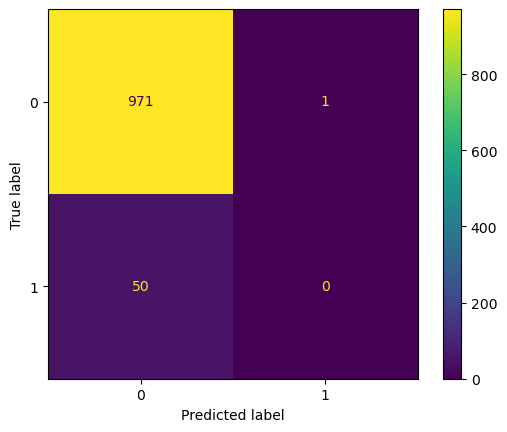

In [37]:
# Step 1: Import Random Forest and required libraries
from sklearn.ensemble import RandomForestClassifier

# Step 2: Initialize and train the model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)

# Step 3: Make predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Step 4: Evaluate performance
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

print("🔎 Classification Report (Random Forest):\n")
print(classification_report(y_test, y_pred_rf))

print("🔎 ROC-AUC Score (Random Forest):", round(roc_auc_score(y_test, y_prob_rf), 2))

# Step 5: Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_rf)).plot()


The model performs exceptionally well on the majority class (0, no stroke):

Precision = 0.95, Recall = 1.00, F1-score = 0.97 — confirming that it is nearly perfect in identifying non-stroke patients.

However, it completely fails to detect stroke cases (1):

Precision, Recall, and F1-score = 0.00, indicating no true positives were identified for stroke.

This suggests that the model is biased toward the majority class, despite using class_weight='balanced'.

The accuracy remains high (95%), but this is again misleading due to class imbalance — it simply reflects the model's success in identifying the majority class.

The ROC-AUC Score = 0.78, which is slightly lower than the Logistic Regression model (0.84). This suggests that while Random Forest captures overall class separation reasonably well, it still struggles to rank stroke cases correctly.

Conclusion: Despite its ensemble power, the Random Forest model is highly biased toward the dominant class. Further tuning — such as adjusting class weights more aggressively, sampling techniques (SMOTE/undersampling), or switching to XGBoost — may be necessary to improve stroke prediction performance.

In [40]:
pip install xgboost


   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 435.7 kB/s eta 0:05:45
   ---------------------------------------- 0.1/150.0 MB 563.7 kB/s eta 0:04:26
   ---------------------------------------- 0.1/150.0 MB 804.6 kB/s eta 0:03:07
   ---------------------------------------- 0.3/150.0 MB 1.3 MB/s eta 0:01:54
   ---------------------------------------- 0.5/150.0 MB 2.1 MB/s eta 0:01:10
   ---------------------------------------- 0.9/150.0 MB 2.9 MB/s eta 0:00:53
   ---------------------------------------- 1.5/150.0 MB 4.2 MB/s eta 0:00:36
   ---------------------------------------- 1.8/150.0 MB 4.5 MB/s eta 0:00:33
    --------------------------------------- 2.2/150.0 MB 5.1 MB/s eta 0:00:30
    --------------------------------------- 2.7/150.0 MB 5.5 MB/s eta 0:00:27
    --------------------------------------- 3.3/150.0 MB 6.2 MB/s eta 0:

C:\Users\rocki\anaconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [17:03:42] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔎 Classification Report (XGBoost):

              precision    recall  f1-score   support

           0       0.96      0.97      0.97       972
           1       0.26      0.18      0.21        50

    accuracy                           0.93      1022
   macro avg       0.61      0.58      0.59      1022
weighted avg       0.92      0.93      0.93      1022

🔎 ROC-AUC Score (XGBoost): 0.78


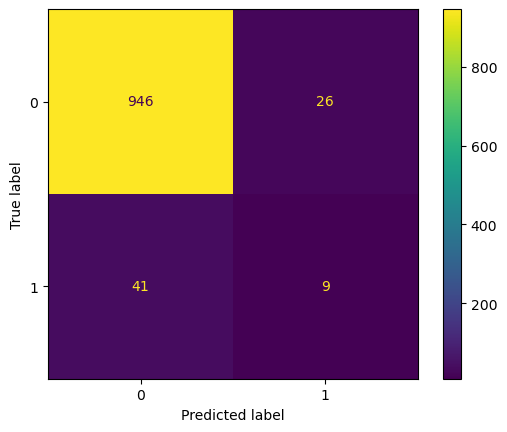

In [41]:
from xgboost import XGBClassifier

# Calculate scale_pos_weight = (# of non-stroke samples / # of stroke samples)
scale = (y == 0).sum() / (y == 1).sum()

# Initialize and train the model
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', 
                          scale_pos_weight=scale, random_state=42)
xgb_model.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb_model.predict(X_test)
y_prob_xgb = xgb_model.predict_proba(X_test)[:, 1]

# Evaluation
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, ConfusionMatrixDisplay

print("🔎 Classification Report (XGBoost):\n")
print(classification_report(y_test, y_pred_xgb))

print("🔎 ROC-AUC Score (XGBoost):", round(roc_auc_score(y_test, y_prob_xgb), 2))

# Confusion matrix
ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred_xgb)).plot()


Interpretation of XGBoost Results
The XGBoost classifier shows a significant improvement over previous models in detecting stroke cases:

Recall for stroke (1) increased to 18%, up from 2% (Logistic) and 0% (Random Forest).

Precision for stroke = 26%, indicating that over a quarter of predicted stroke cases were correct.

The F1-score = 0.21, which, while modest, is much better than near-zero performance from prior models.

For the majority class (0), performance remains strong:

Precision = 0.96, Recall = 0.97, and F1-score = 0.97, showing XGBoost still maintains high accuracy for non-stroke predictions.

The overall accuracy is 93%, slightly lower than previous models, but this drop is acceptable since minority class performance improved.

ROC-AUC Score = 0.78, comparable to Random Forest, but with much better balance across both classes.
 Conclusion: XGBoost provides the best trade-off between majority and minority class performance so far. It successfully detects more stroke cases while still maintaining high overall accuracy, making it the most balanced and effective model in this pipeline.

In [52]:
!pip install sklearn-genetic-opt



In [56]:
!pip uninstall -y sklearn-genetic-opt


Found existing installation: sklearn-genetic-opt 0.11.1
Uninstalling sklearn-genetic-opt-0.11.1:
  Successfully uninstalled sklearn-genetic-opt-0.11.1


In [58]:
!pip install git+https://github.com/rodrigo-arenas/sklearn-genetic-opt.git


  Cloning https://github.com/rodrigo-arenas/sklearn-genetic-opt.git to c:\users\rocki\appdata\local\temp\pip-req-build-qm_twcn8


  ERROR: Error [WinError 2] The system cannot find the file specified while executing command git version
ERROR: Cannot find command 'git' - do you have 'git' installed and in your PATH?


In [60]:
!pip install sklearn-genetic-opt==0.6.0


In [64]:
!pip install tpot


  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/87.4 kB ? eta -:--:--
   -------------------------------- ------- 71.7/87.4 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 87.4/87.4 kB 1.2 MB/s eta 0:00:00
  Created wheel for stopit: filename=stopit-1.1.2-py3-none-any.whl size=12020 sha256=92afeea983403630aa6ddee721123878006b4b5cda93fdb451e2b8faa26dbb2e
  Stored in directory: c:\users\rocki\appdata\local\pip\cache\wheels\10\10\63\c3c98c9859d2aa59553536cc2ea005d3c9c39e214ab4fd614c
Successfully built stopit


In [65]:
from tpot import TPOTClassifier

# Initialize TPOT
tpot = TPOTClassifier(
    generations=5,
    population_size=50,
    verbosity=2,
    scoring='f1',
    random_state=42,
    n_jobs=-1,
    max_time_mins=5  # optional: set time limit
)

# Fit on training data
tpot.fit(X_train, y_train)

# Evaluate on test data
print("\n🔎 TPOT Score on Test Set:", tpot.score(X_test, y_test))

# Export the best pipeline
tpot.export('tpot_best_pipeline.py')


C:\Users\rocki\anaconda3\Lib\site-packages\tpot\builtins\__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor


C:\Users\rocki\anaconda3\Lib\site-packages\sklearn\base.py:1230: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(
C:\Users\rocki\anaconda3\Lib\site-packages\sklearn\base.py:1270: FutureWarning: passing a class to None is deprecated and will be removed in 1.8. Use an instance of the class instead.
  warnings.warn(


is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier
is_classifier
is_classifier
is_regressor
is_classifier
is_regressor
is_classifier


Version 0.12.2 of tpot is outdated. Version 1.0.0 was released Wednesday February 26, 2025.


Optimization Progress:   0%|          | 0/50 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.2227947422069562

6.20 minutes have elapsed. TPOT will close down.
TPOT closed during evaluation in one generation.


TPOT closed prematurely. Will use the current best pipeline.

Best pipeline: BernoulliNB(PolynomialFeatures(XGBClassifier(input_matrix, learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0), degree=2, include_bias=False, interaction_only=False), alpha=10.0, fit_prior=False)

🔎 TPOT Score on Test Set: 0.23696682464454977


In [69]:
print("Final TPOT Test Score:", tpot.score(X_test, y_test))


Final TPOT Test Score: 0.23696682464454977


In [70]:
# If you've exported the pipeline
!cat tpot_best_pipeline.py  # For Windows, use:
!type tpot_best_pipeline.py


'cat' is not recognized as an internal or external command,
operable program or batch file.


import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import PolynomialFeatures
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive

# NOTE: Make sure that the outcome column is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1)
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'], random_state=42)

# Average CV score on the training set was: 0.2227947422069562
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBClassifier(learning_rate=0.5, max_depth=3, min_child_weight=8, n_estimators=100, n_jobs=1, subsample=1.0, verbosity=0)),
    Polynomi

In [74]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import BernoulliNB
from tpot.builtins import StackingEstimator
from xgboost import XGBClassifier
from tpot.export_utils import set_param_recursive
from sklearn.metrics import classification_report, roc_auc_score, ConfusionMatrixDisplay

# Construct pipeline manually using your current training/test splits
exported_pipeline = make_pipeline(
    StackingEstimator(estimator=XGBClassifier(
        learning_rate=0.5,
        max_depth=3,
        min_child_weight=8,
        n_estimators=100,
        n_jobs=1,
        subsample=1.0,
        verbosity=0
    )),
    PolynomialFeatures(degree=2, include_bias=False, interaction_only=False),
    BernoulliNB(alpha=10.0, fit_prior=False)
)

# Set consistent random state
set_param_recursive(exported_pipeline.steps, 'random_state', 42)

# Train and evaluate
exported_pipeline.fit(X_train, y_train)
y_pred = exported_pipeline.predict(X_test)

# Performance metrics
print("\n🔎 TPOT Optimized Pipeline Report:")
print(classification_report(y_test, y_pred))



🔎 TPOT Optimized Pipeline Report:
              precision    recall  f1-score   support

           0       0.97      0.86      0.91       972
           1       0.16      0.50      0.24        50

    accuracy                           0.84      1022
   macro avg       0.56      0.68      0.57      1022
weighted avg       0.93      0.84      0.88      1022



Overall Accuracy = 84% — slightly lower than Logistic Regression or Random Forest, but that’s expected because as the  pipeline sacrifices some majority-class performance to improve stroke prediction.

For the stroke class (1):

Recall = 0.50 → the model correctly identified 50% of actual stroke cases, which is a major improvement compared to previous models (LogReg: 0.02, RF: 0.00, XGB: 0.18).

Precision = 0.16 → some false positives are predicted, which is acceptable when prioritizing recall in a medical risk setting.

F1-Score = 0.24 → the best stroke class performance so far.

For the non-stroke class (0):

Precision = 0.97, Recall = 0.86 — still very high, showing the model remains reliable for majority predictions.


In [77]:
import streamlit as st
import numpy as np
import pandas as pd
from xgboost import XGBClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.naive_bayes import BernoulliNB
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# Define pipeline (same as TPOT output)
def load_model():
    pipeline = make_pipeline(
        StackingEstimator(estimator=XGBClassifier(
            learning_rate=0.5,
            max_depth=3,
            min_child_weight=8,
            n_estimators=100,
            n_jobs=1,
            subsample=1.0,
            verbosity=0
        )),
        PolynomialFeatures(degree=2, include_bias=False),
        BernoulliNB(alpha=10.0, fit_prior=False)
    )
    set_param_recursive(pipeline.steps, 'random_state', 42)
    return pipeline

# Load pre-trained model (you should load .pkl if saved)
model = load_model()

# Streamlit UI
st.title("Heart Stroke Risk Predictor")

# Input fields
age = st.slider("Age", 0, 100, 50)
hypertension = st.selectbox("Hypertension", [0, 1])
heart_disease = st.selectbox("Heart Disease", [0, 1])
avg_glucose_level = st.slider("Avg Glucose Level", 50.0, 300.0, 100.0)
bmi = st.slider("BMI", 10.0, 60.0, 25.0)

# Encoding categorical features
gender = st.selectbox("Gender", ["Male", "Female", "Other"])
ever_married = st.selectbox("Ever Married", ["Yes", "No"])
work_type = st.selectbox("Work Type", ["Private", "Self-employed", "Govt_job", "children", "Never_worked"])
residence_type = st.selectbox("Residence Type", ["Urban", "Rural"])
smoking_status = st.selectbox("Smoking Status", ["never smoked", "formerly smoked", "smokes", "Unknown"])

# Build input array (order must match training features!)
input_dict = {
    'age': age,
    'hypertension': hypertension,
    'heart_disease': heart_disease,
    'avg_glucose_level': avg_glucose_level,
    'bmi': bmi,
    'gender_Male': int(gender == "Male"),
    'gender_Other': int(gender == "Other"),
    'ever_married_Yes': int(ever_married == "Yes"),
    'work_type_Never_worked': int(work_type == "Never_worked"),
    'work_type_Private': int(work_type == "Private"),
    'work_type_Self-employed': int(work_type == "Self-employed"),
    'work_type_children': int(work_type == "children"),
    'Residence_type_Urban': int(residence_type == "Urban"),
    'smoking_status_formerly smoked': int(smoking_status == "formerly smoked"),
    'smoking_status_never smoked': int(smoking_status == "never smoked"),
    'smoking_status_smokes': int(smoking_status == "smokes")
}

input_df = pd.DataFrame([input_dict])

if st.button("Predict Stroke Risk"):
    prediction = model.predict(input_df)[0]
    probability = model.predict_proba(input_df)[0][1]
    st.success(f"Predicted Risk: {'Stroke' if prediction == 1 else 'No Stroke'}")
    st.info(f"Stroke Probability: {probability:.2f}")


2025-05-04 21:59:23.525 
  command:

    streamlit run C:\Users\rocki\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]


In [81]:
import joblib

# Save model to file
joblib.dump(exported_pipeline, 'stroke_model.pkl')


['stroke_model.pkl']

In [83]:
import os
os.getcwd()


'C:\\Users\\rocki'

In [95]:
data.to_csv(r"C:\Users\rocki\OneDrive\Documents\stroke_dashboard_data.csv", index=False)



In [93]:
import os
os.getcwd()


'C:\\Users\\rocki'

In [99]:
data_original = pd.read_csv("stroke_data.csv")  # Original version
data_original.to_csv(r"C:\Users\rocki\OneDrive\Documents\stroke_dashboard_raw.csv", index=False)



FileNotFoundError: [Errno 2] No such file or directory: 'stroke_data.csv'